    Importamos las librerias necesarias para la resolución del Datathon.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

    Ingestamos el Dataset para el entrenamiento del modelo.

In [50]:
df = pd.read_excel("C:/Users/Nico/Desktop/Datathon/E-Commerce_train.xlsx")
df 

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


     Verificamos si en el Dataset hay Nulos

In [51]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

    Observamos las estadísticas del Dataset utilizando "describe".

In [52]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Se observa que la media de entregas es de %63.55.

    Visualizamos cuales son los Valores únicas de 'Reached.on.Time_Y.N'

In [53]:
u = df['Reached.on.Time_Y.N'].unique()
u

array([1, 0], dtype=int64)

    Ploteamos la cantidad de Entregas realizadas = 1 y las Entregas no Realizadas = 0

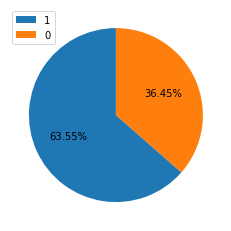

In [54]:
fig, ax = plt.subplots()

ax.pie(df['Reached.on.Time_Y.N'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.legend(u)
plt.show()


    Mediante el plot volvemos a verificar que %63.55 de los envios se realizaron.

Ahora debemos reducir la dimensionalidad del Sataset. Para ello realizaremos un analisis de correlación de las variables utilizando Heatmap y test chicuad (que se utilizan para interpretar la relacion entre dos variables Categóricas).
Realizaremos primero un analisis con Heatmap.

<AxesSubplot:>

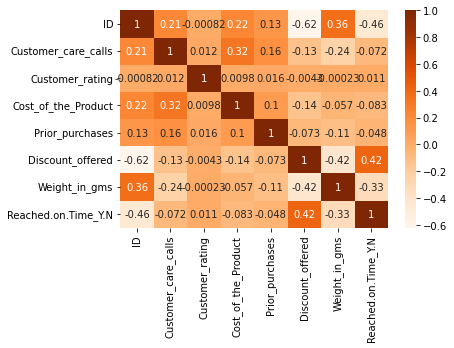

In [56]:
mapcal = df.corr()
sns.heatmap(mapcal, cmap="Oranges", annot=True)

Se observa que "ID", "Customer_care_calls", "Weight_in_gms" y "Discount_offered" tienen correlacion con otras variable por lo cual procedemos a Dropearlas.

In [57]:
df.drop(['ID'], axis=1, inplace=True)
df.drop(['Customer_care_calls'], axis=1, inplace=True)
df.drop(['Discount_offered'], axis=1, inplace=True)
df.drop(['Weight_in_gms'], axis=1, inplace=True)

    Realizamos el test Chicuaq con las Varibles que no utilizamos en la realizacion del Heatmap (Variables Categóricas)

Warehouse_block

In [58]:
Warehouse = pd.crosstab(df['Warehouse_block'], df['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(Warehouse)
print("Test Chicuad = ",ChiSqResult[1])

Test Chicuad =  0.9071521437355561


Gender

In [59]:
Gender = pd.crosstab(df['Gender'], df['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(Gender)
print("Test Chicuad",ChiSqResult[1])

Test Chicuad 0.8015181812471062


Product_importance

In [60]:
Product = pd.crosstab(df['Product_importance'], df['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(Product)
print("Test Chicuad = ",ChiSqResult[1])

Test Chicuad =  0.175738927009453


Mode_of_shipment

In [61]:
Mode = pd.crosstab(df['Mode_of_Shipment'], df['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(Mode)
print("Test Chicuad = ",ChiSqResult[1])

Test Chicuad =  0.2568899601964812


Una vez obtenidos los valores de los test se observan que las variables no estan relacionadas, por lo tanto Dropeamos las mismas. 

In [62]:
df.drop(['Product_importance', 'Warehouse_block', 'Mode_of_Shipment', 'Gender'], axis=1, inplace=True)

    Volvemos a realizar un Heatmap con las variables a utilizar para nuestro Modelo.

<AxesSubplot:>

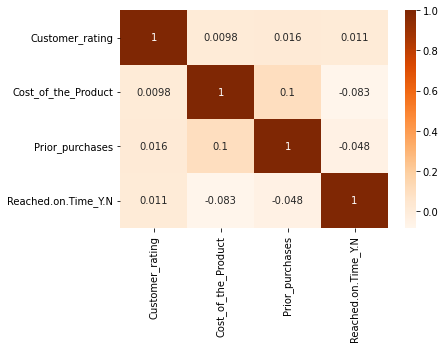

In [63]:
mapcal = df.corr()
sns.heatmap(mapcal, cmap="Oranges", annot=True)

    Definimos las variables dependientes e independientes del modelo.

In [64]:
X = df.drop(['Reached.on.Time_Y.N'], axis = 1)
y = df['Reached.on.Time_Y.N']

    Segmentamos los datos de entrenamiento y prueba del modelo.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=46)

In [66]:
Sc = MinMaxScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.fit_transform(X_test)

    Realizamos la Regresion Logistica.

Se instancia al modelo y de lo entrena.

In [67]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

    Realizamos la Predicción.

Y se evalua.

In [68]:
from sklearn.metrics import accuracy_score 
y_pred = clf.predict(X)
print('El score del modelo accuracy_score es:', accuracy_score(y, y_pred))

El score del modelo accuracy_score es: 0.6352928103122569


In [69]:
from sklearn.metrics import recall_score
print('El score del modelo recall_score es:', recall_score(y, y_pred))


El score del modelo recall_score es: 0.9986011540479105


    Ingestamos el Dataset de Prueba

Luego eliminamos las Variables que sacamos del Dataset de Entrenamiento para obtener las Variables que nos interesan para predecir el Modelo.

In [70]:
prueba = pd.read_excel("C:/Users/Nico/Desktop/Datathon/E-Commerce_test.xlsx")
prueba

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210


In [71]:
X2 = prueba.drop(['ID', 'Warehouse_block','Mode_of_Shipment', 'Customer_care_calls',  'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms' ], axis = 1)

    Evaluamos el modelo.

In [72]:
y2_pred = clf.predict(X2)

    Creamos el csv para la evaluacion de los resultados en el Datathon

In [74]:
Nico96=pd.DataFrame(y2_pred)
Nico96.columns=['pred']
Nico96.to_csv("Nico-96.csv", index = False)